# Analyzing Salary Data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# df_salary = pd.read_csv("/kaggle/input/salary/Salary.csv") # on Kaggle
df_salary = pd.read_csv("salary.csv") # local

df_salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


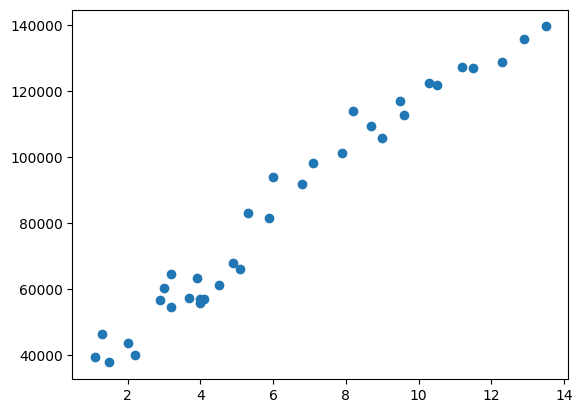

In [4]:
# Always plot your data
years_experience_values = df_salary.YearsExperience.values
salary_values = df_salary["Salary"].values
plt.scatter(years_experience_values, salary_values)
plt.show()


## Done with Plotting the initial data
Now we want to get a model involved so we can make predictions

First thing we need to do is "massage" the shape of the data so it's in form that SciKitLearn likes.

## Create a Column Vector

In [5]:
years_experience_vector = years_experience_values.reshape(-1,1)
years_experience_vector[:2]

array([[1.1],
       [1.3]])

In [6]:
model = LinearRegression().fit(years_experience_vector, salary_values)

In [7]:
model

LinearRegression()

## Now we can ask model to make a prediction

In [8]:
prediction = model.predict(years_experience_vector)
prediction

array([ 38464.6613463 ,  40211.04955571,  41957.43776513,  46323.40828866,
        48069.79649807,  54182.15523101,  55055.34933572,  56801.73754513,
        56801.73754513,  61167.70806866,  62914.09627808,  63787.29038278,
        63787.29038278,  64660.48448749,  68153.26090631,  71646.03732514,
        73392.42553455,  75138.81374396,  80377.9783722 ,  81251.17247691,
        88236.72531456,  90856.30762868,  97841.86046633, 100461.44278044,
       104827.41330398, 107446.99561809, 111812.96614163, 112686.16024633,
       118798.51897928, 120544.90718869, 126657.26592163, 129276.84823575,
       136262.4010734 , 141501.56570164, 146740.73032988])

## Not very pleasant to look at, let's plot those predictions...

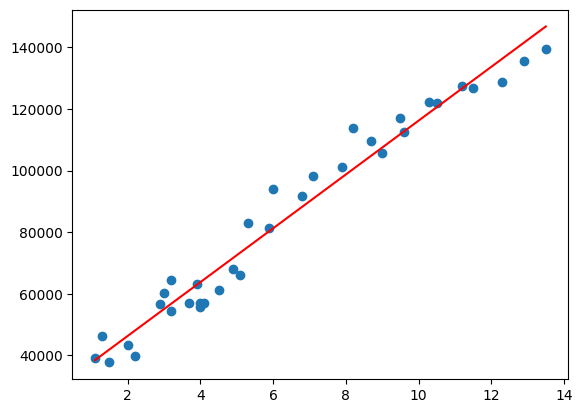

In [9]:
plt.scatter(years_experience_values, salary_values)
plt.plot(years_experience_values, prediction, color="red")
plt.show()

In [10]:
num_years = 10
salary_predict = model.predict([[num_years]])[0]
print(f"After {num_years} years your salary is predicted to be ${int(salary_predict)}")

After 10 years your salary is predicted to be $116178


## Seems like a reasonable-ish prediction. Is it? In other words, can we measure how reasonable it is?

# Test Train Split

## Train the Model

In [11]:
# use some data for training, and hold back some data for testing
x_train, x_test, y_train, y_test = train_test_split(years_experience_vector, salary_values, train_size=.8, test_size=.2)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (28, 1)
y_train shape (28,)
X_test shape (7, 1)
y_test shape (7,)


## Plot the Training Data

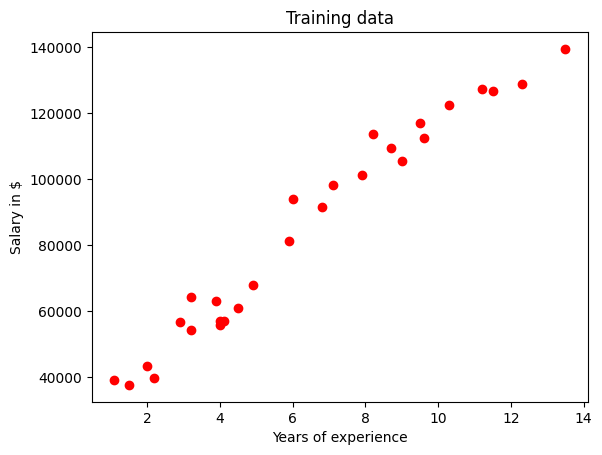

In [12]:
plt.scatter(x_train,y_train,color='red')
plt.xlabel('Years of experience')
plt.ylabel('Salary in $')
plt.title('Training data')
plt.show()

## Plot Testing Data

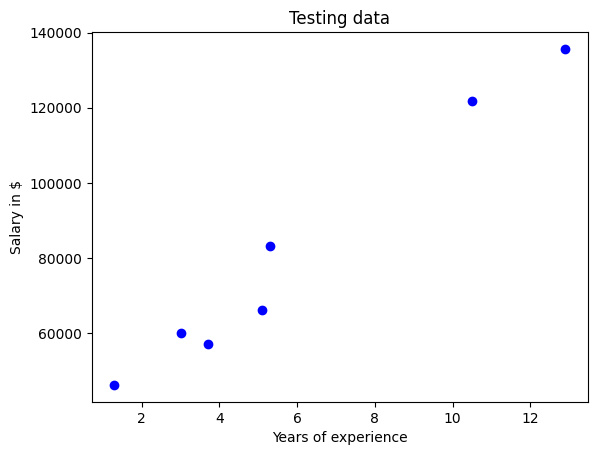

In [13]:
plt.scatter(x_test,y_test,color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary in $')
plt.title('Testing data')
plt.show()

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [15]:
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 96.5 %
Test accuracy 96.28 %


In [16]:
round(.758123456 * 100,2)

75.81

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

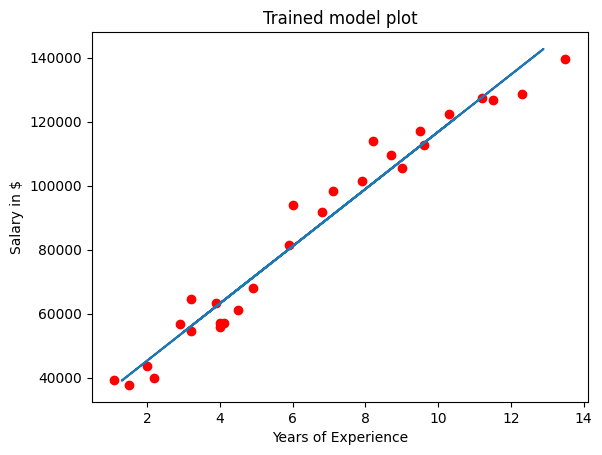

In [17]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Years of Experience")
plt.ylabel("Salary in $")
plt.title("Trained model plot")
plt.plot

In [18]:
num_years = 20
salary_predict = lm.predict([[num_years]])[0]
print(f"After {num_years} years your salary is predicted to be ${int(salary_predict)}")

After 20 years your salaray is predicted to be $206145
